#What is transfer learning ?
Transfer learning is a machine learning technique where a model trained on one task is adapted or fine-tuned for a second related task. Instead of training a model from scratch for the new task, you leverage the knowledge and representations learned from the source task to expedite and enhance the learning process for the target task. Transfer learning has become popular in various domains, including natural language processing, computer vision, and many others, because it can lead to significant improvements in both training efficiency and model performance.

for exampl ImageNet is a well-known large-scale dataset for training and evaluating computer vision models, particularly for image classification and object detection tasks. ImageNet contains millions of labeled images belonging to thousands of different categories or classes.

#why transfer learning?

1. Save Time: Imagine you have a friend who's really good at math. Instead of starting from scratch, you ask them to help you with your math homework, making it quicker and easier.

2. Better Results: Your friend knows a lot about different types of math problems. So, when they help you, your answers are often more accurate because they use their math knowledge to guide you.

3. Less Work: You don't have to become a math expert yourself. You can build on your friend's knowledge and only focus on the specific math problems you need to solve.

4. Works in Many Situations: This approach is like having a helpful friend for different subjects. Your friend's general knowledge can be adapted to help you with various tasks, just like pre-trained models can be adapted for different machine learning jobs.

So, transfer learning is about using pre-trained models to make the learning process faster, get better results, and reduce the amount of work needed for specific tasks in the world of machine learning.

EfficientNet models have become popular choices for various computer vision tasks because they offer an attractive trade-off between accuracy and computational efficiency. They are often used as a foundation for transfer learning and fine-tuning on specific tasks, where you can leverage the knowledge and feature representations learned by these efficient models.

In [ ]:

# Get data (10% of labels)
import zipfile

# Download data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_10_percent.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-11-02 15:40:20--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 2607:f8b0:4023:c03::cf, 2607:f8b0:4023:c06::cf, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   238MB/s    in 0.7s    

2023-11-02 15:40:21 (238 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [ ]:
!ls 10_food_classes_10_percent/

test  train


In [ ]:
import  os ##

for dirpath,dirnames , filenames in os.walk('10_food_classes_10_percent'):
    print(f"there are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

there are 2 directories and 0 images in '10_food_classes_10_percent'.
there are 10 directories and 0 images in '10_food_classes_10_percent/train'.
there are 0 directories and 75 images in '10_food_classes_10_percent/train/hamburger'.
there are 0 directories and 75 images in '10_food_classes_10_percent/train/grilled_salmon'.
there are 0 directories and 75 images in '10_food_classes_10_percent/train/fried_rice'.
there are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_curry'.
there are 0 directories and 75 images in '10_food_classes_10_percent/train/steak'.
there are 0 directories and 75 images in '10_food_classes_10_percent/train/ice_cream'.
there are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_wings'.
there are 0 directories and 75 images in '10_food_classes_10_percent/train/sushi'.
there are 0 directories and 75 images in '10_food_classes_10_percent/train/pizza'.
there are 0 directories and 75 images in '10_food_classes_10_percent

#loading the data

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SHAPE =(224,224)
BATCH_SIZE = 32

train_dir = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

train_datagen = ImageDataGenerator(rescale = 1/225.)
test_datagen =  ImageDataGenerator(rescale = 1/255.)

print("training Images")
train_data_10_percent = train_datagen.flow_from_directory(train_dir, target_size = IMAGE_SHAPE, batch_size = BATCH_SIZE, class_mode = "categorical")

print("training Images")
test_data_10_percent = test_datagen.flow_from_directory(test_dir, target_size = IMAGE_SHAPE, batch_size = BATCH_SIZE, class_mode = "categorical")

training Images
Found 750 images belonging to 10 classes.
training Images
Found 2500 images belonging to 10 classes.


#callbacks in tensorflow

calback are finction that can be added to model while they are training

Tracking experiment with tensorflow borad callback

Modelcheckpint with the ModelCheckpoint Callback

Stopping a model from training (before it trains too long to over fitting )with Early stopping callback




In [ ]:
# function callback tensorboard
import tensorflow as tf
import datetime
def create_tensorflow_callback( dir_name , experiment_name):
    log_dir = dir_name + "/" + experiment_name + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir)
    print(f"saving the tensorboard log files to : {log_dir}")
    return tensorboard_callback

####tensorflow Hub
 we can access pre trained model from tensorflow hub

 https://tfhub.dev

 go through the above link to get the efficent pre trained models


In [ ]:
# lets compare the following two models

resnet_url = 'https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5'

efficientnet_url = 'https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1'



In [ ]:
import tensorflow_hub as hub
from tensorflow.keras import layers


In [ ]:
#lets make a create_model( function to create a model from url)

def create_model(model_url, num_classes = 10):
    feature_extract_layer = hub.KerasLayer(model_url,trainable = False,name = 'feature_extraction_layer',input_shape = IMAGE_SHAPE +(3,))


    model = tf.keras.Sequential([
    feature_extract_layer , # use the feature extraction layer as the base
    layers.Dense(num_classes, activation='softmax', name='output_layer') # create our own output layer
  ])

    return model

In [ ]:

# Create model
resnet_model = create_model(resnet_url, num_classes=train_data_10_percent.num_classes)

# Compile
resnet_model.compile(loss='categorical_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])


In [ ]:
#fit resent model
resnet_history = resnet_model.fit(train_data_10_percent,
                                  epochs=5,
                                  steps_per_epoch=len(train_data_10_percent),
                                  validation_data=test_data_10_percent,
                                  validation_steps=len(test_data_10_percent),
                                  # Add TensorBoard callback to model (callbacks parameter takes a list)
                                  callbacks=[create_tensorflow_callback(dir_name="tensorflow_hub", # save experiment logs here
                                                                         experiment_name="resnet50V2")])

saving the tensorboard log files to : tensorflow_hub/resnet50V220231102-165712
Epoch 1/5
24/24 [==============================] - 25s 547ms/step - loss: 1.9612 - accuracy: 0.3307 - val_loss: 1.2281 - val_accuracy: 0.6208
Epoch 2/5
24/24 [==============================] - 11s 462ms/step - loss: 0.9092 - accuracy: 0.7240 - val_loss: 0.8477 - val_accuracy: 0.7392
Epoch 3/5
24/24 [==============================] - 11s 448ms/step - loss: 0.6143 - accuracy: 0.8227 - val_loss: 0.7638 - val_accuracy: 0.7568
Epoch 4/5
24/24 [==============================] - 11s 463ms/step - loss: 0.4740 - accuracy: 0.8707 - val_loss: 0.6963 - val_accuracy: 0.7768
Epoch 5/5
24/24 [==============================] - 11s 480ms/step - loss: 0.3758 - accuracy: 0.9173 - val_loss: 0.6710 - val_accuracy: 0.7836


In [ ]:
resnet_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (  (None, 2048)              23564800  
 KerasLayer)                                                     
                                                                 
 output_layer (Dense)        (None, 10)                20490     
                                                                 
Total params: 23585290 (89.97 MB)
Trainable params: 20490 (80.04 KB)
Non-trainable params: 23564800 (89.89 MB)
_________________________________________________________________


#Ploting the loss curve


In [ ]:
# If you wanted to, you could really turn this into a helper function to load in with a helper.py script...
import matplotlib.pyplot as plt

# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();


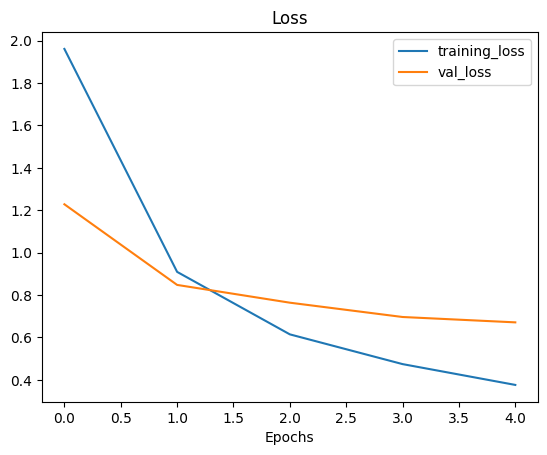

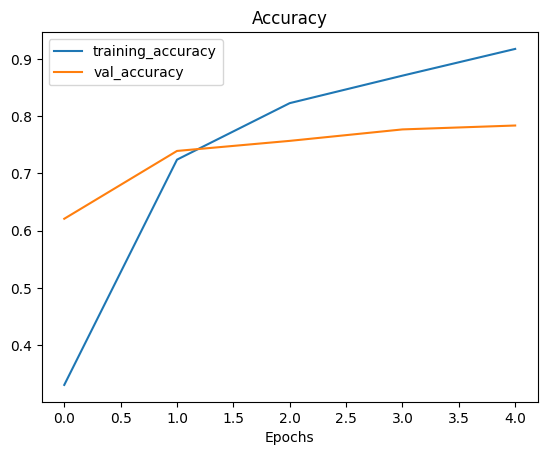

In [ ]:
plot_loss_curves(resnet_history)

Now efficientNet


In [ ]:

# Create model
efficientnet_model = create_model(efficientnet_url, num_classes=train_data_10_percent.num_classes)

# Compile
efficientnet_model.compile(loss='categorical_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])

#fit resent model
efficientnet_history = efficientnet_model.fit(train_data_10_percent,
                                  epochs=5,
                                  steps_per_epoch=len(train_data_10_percent),
                                  validation_data=test_data_10_percent,
                                  validation_steps=len(test_data_10_percent),
                                  # Add TensorBoard callback to model (callbacks parameter takes a list)
                                  callbacks=[create_tensorflow_callback(dir_name="tensorflow_hub", # save experiment logs here
                                                                         experiment_name="efficientnet")])

saving the tensorboard log files to : tensorflow_hub/efficientnet20231102-170518
Epoch 1/5
24/24 [==============================] - 33s 594ms/step - loss: 1.8521 - accuracy: 0.4440 - val_loss: 1.3101 - val_accuracy: 0.7476
Epoch 2/5
24/24 [==============================] - 10s 445ms/step - loss: 1.0970 - accuracy: 0.7667 - val_loss: 0.8879 - val_accuracy: 0.8172
Epoch 3/5
24/24 [==============================] - 10s 445ms/step - loss: 0.7891 - accuracy: 0.8280 - val_loss: 0.7201 - val_accuracy: 0.8356
Epoch 4/5
24/24 [==============================] - 10s 439ms/step - loss: 0.6284 - accuracy: 0.8733 - val_loss: 0.6320 - val_accuracy: 0.8448
Epoch 5/5
24/24 [==============================] - 10s 414ms/step - loss: 0.5369 - accuracy: 0.8907 - val_loss: 0.5871 - val_accuracy: 0.8472


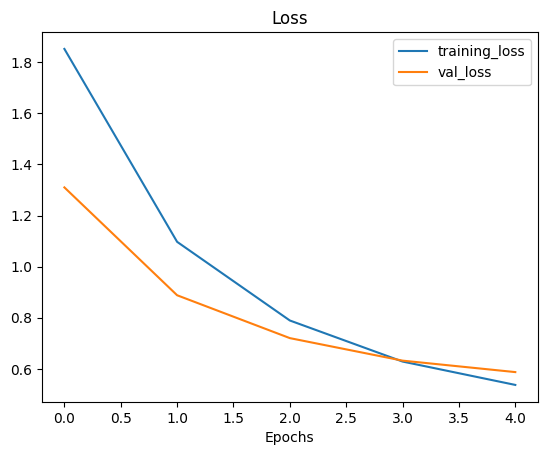

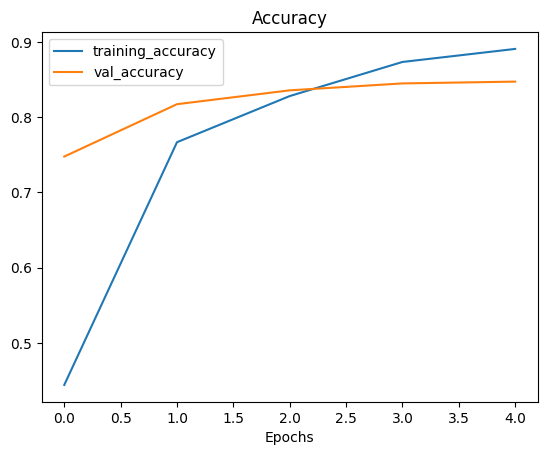

In [ ]:
plot_loss_curves(efficientnet_history)

#Tensor board



In [ ]:
!tensorboard dev upload --logdir ./tensorflow_hub/ \
  --name "EfficientNetB0 vs. ResNet50V2" \
  --description "Comparing two different TF Hub feature extraction models architectures using 10% of training images" \
  --one_shot

2023-11-02 17:29:23.082870: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-02 17:29:23.082924: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-02 17:29:23.082986: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-02 17:29:24.078101: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

****************************************************************
****************************************************************
****************************************************************

NOTICE - ACTION REQUIRED: TensorBoard.dev